<a href="https://colab.research.google.com/github/Prophetcze/MPA-MLF/blob/main/Final_project/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MPA-MLF Final project - Classification of room occupancy
The project’s task is to classify the number of persons in the room from 60 GHz signal transmission. The dataset consists of snapshots of signals in the delay-Doppler domain that represent the reflections from the targets (human- s/machines) at some distance from the receiver moving with some velocity. To explain, the faster the object moves, the higher the Doppler frequency shifts it generates. The farther from the receiver the person is, the higher the delay it generates.

### Goal of the project
The goal is to classify the number of persons present in the room from a given snapshot. Thus, one of the following four classes may be valid:
* Machine only, zero person in the room
* One person in the room
* Two persons in the room
* Three persons in the room.

In [1]:
# Import of used libraries for model of ML algorithm
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import to_categorical

# Import of used libraries for processing the results
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import csv

# Import of used libraries for image processing
import os
import random
from PIL import Image
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img, img_to_array
from keras.utils import to_categorical

font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

In [2]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Loading the dataset from Google Drive
image_train_dir = '/content/drive/MyDrive/Data/Final_project/train_data_unlabeled/'
image_test_dir = '/content/drive/MyDrive/Data/Final_project/test_data_unlabeled/'
csv_file_path = '/content/drive/MyDrive/Data/Final_project/y_train.csv'

In [4]:
# Code for reparation id numbers of train data
labels_df = pd.read_csv(csv_file_path)
labels_df.index = labels_df.index + 1
print(labels_df.head())

   id  target
1   0       0
2   1       1
3   2       0
4   3       2
5   4       2


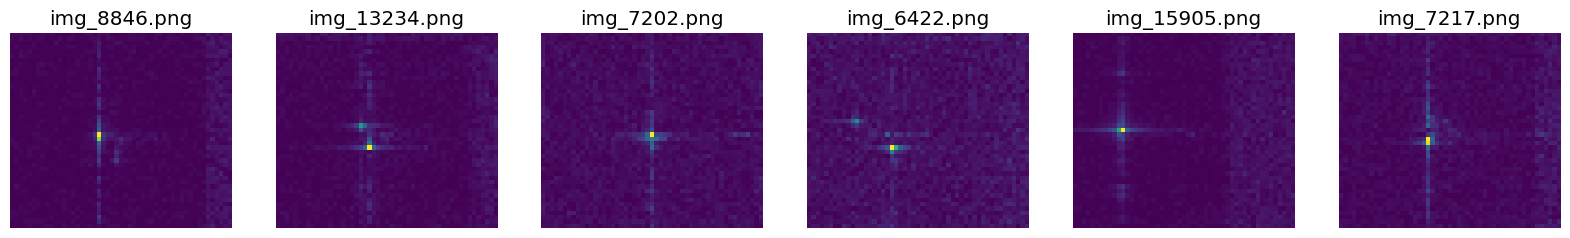

In [5]:
# Showing some random pictures from training dataset
def show_random_images(image_dir, num_images=6):
    images = os.listdir(image_dir)
    selected_images = random.sample(images, num_images)

    plt.figure(figsize=(20, 10))
    for i, image_name in enumerate(selected_images):
        image_path = os.path.join(image_dir, image_name)
        image = Image.open(image_path)
        monochrome_image = image.convert('L')
        plt.subplot(1, num_images, i+1)
        plt.imshow(monochrome_image)
        plt.axis('off')
        plt.title(image_name)
    plt.show()

show_random_images(image_train_dir)

In [6]:
# Loading and preprocessing of the train images
images = []
labels = []

image_height = 128
image_width = 128

for index, row in labels_df.iterrows():
    image_path = os.path.join(image_train_dir, 'img_' + str(row['id'] + 1) + '.png')
    image = load_img(image_path, target_size=(image_height, image_width))
    image = image.convert('L')
    image = img_to_array(image)
    images.append(image)
    labels.append(row['target'])

images = np.array(images)
labels = np.array(labels)

images = images / 255.0

train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)

In [7]:
# Machine learning model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.15))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.10))

model.add(Conv2D(512, (3, 3), activation='relu'))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(4, activation='softmax'))

In [8]:
# Compilation of model and its summary
optimizer = Adam(0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0

In [9]:
# Training of the model
history = model.fit(train_images, train_labels, epochs=40, batch_size=32, validation_data=(val_images, val_labels))

Epoch 1/40
405/405 [==============================] - 26s 33ms/step - loss: 0.8169 - accuracy: 0.6385 - val_loss: 0.4887 - val_accuracy: 0.8171
Epoch 2/40
405/405 [==============================] - 12s 30ms/step - loss: 0.3895 - accuracy: 0.8527 - val_loss: 0.2809 - val_accuracy: 0.8863
Epoch 3/40
405/405 [==============================] - 12s 29ms/step - loss: 0.2978 - accuracy: 0.8864 - val_loss: 0.1970 - val_accuracy: 0.9280
Epoch 4/40
405/405 [==============================] - 12s 30ms/step - loss: 0.2402 - accuracy: 0.9105 - val_loss: 0.1835 - val_accuracy: 0.9345
Epoch 5/40
405/405 [==============================] - 12s 29ms/step - loss: 0.2051 - accuracy: 0.9232 - val_loss: 0.1972 - val_accuracy: 0.9268
Epoch 6/40
405/405 [==============================] - 12s 30ms/step - loss: 0.1796 - accuracy: 0.9336 - val_loss: 0.1486 - val_accuracy: 0.9462
Epoch 7/40
405/405 [==============================] - 12s 30ms/step - loss: 0.1558 - accuracy: 0.9429 - val_loss: 0.1373 - val_accuracy:

In [10]:
# Calculation of results
score = model.evaluate(val_images, val_labels, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

Test loss: 0.0729721188545227
Test accuracy: 98.14643263816833 %


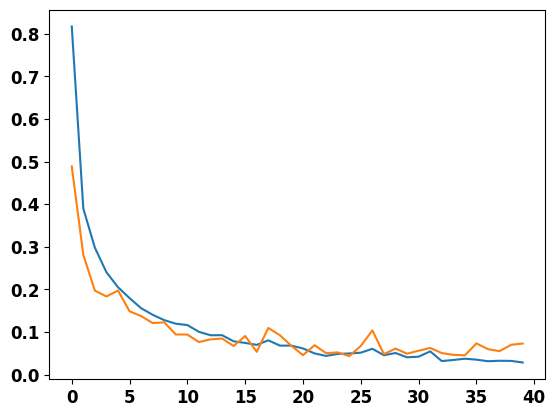

In [11]:
# Showing results as graph, loss and validation loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

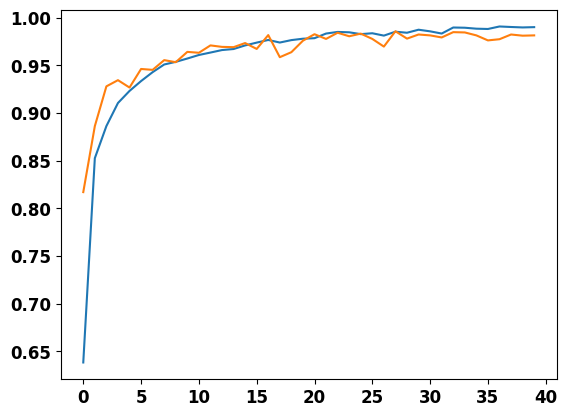

In [12]:
# Showing results as graph, accuracy and validation accuracy
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [13]:
# Loading and processing of the test images
test_images = []
image_height = 128
image_width = 128

# Sorting out the pictures based on their numbers
sorted_img_names = sorted(os.listdir(image_test_dir), key=lambda x: int(x.split('_')[1].split('.')[0]))

for img_name in sorted_img_names:
    img_path = os.path.join(image_test_dir, img_name)
    img = load_img(img_path, target_size=(image_height, image_width))
    img = img.convert('L')
    img = img_to_array(img)
    test_images.append(img)

test_images = np.array(test_images) / 255.0

In [47]:
# Apply model to the provided dataset
predictions = model.predict(test_images)

# Convert predictions (probability of number of persons in room) to the index = number of persons
predicted = np.argmax(predictions,axis=1)

prediction_file = "model_19042024_(9852).csv"

csv_file_path='/content/drive/MyDrive/Data/Final_project/'+prediction_file
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['id', 'target'])
    for idx, prediction in enumerate(predicted):
        writer.writerow([idx, prediction])

print(f"Predictions saved to CSV file: {csv_file_path}")

150/150 [==============================] - 2s 10ms/step
Predictions saved to CSV file: /content/drive/MyDrive/Data/Final_project/model_19042024_(9852).csv
